In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Importing Datasets

In [2]:
df_img = pd.read_csv("/Users/kristinlokaoydna/UiB_Bioinformatikk/H21/INF264/Python/Prosjekt/2/handwritten_digits_images.csv", header = None)
x_data = df_img.to_numpy()

df_label = pd.read_csv("/Users/kristinlokaoydna/UiB_Bioinformatikk/H21/INF264/Python/Prosjekt/2/handwritten_digits_labels.csv", header = None)
y_data = df_label.to_numpy()
y_data = y_data.flatten()

### Splitting Dataset

In [3]:
X_train, X_val_test, y_train, y_val_test = train_test_split(x_data, y_data, test_size = 0.3, shuffle = True, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, shuffle = True, random_state = 42)

## Model Selection

In [4]:
models = {'kNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance'),
          'mlp': MLPClassifier(alpha= 0.1, hidden_layer_sizes= 200, max_iter= 100, random_state=42), 
          'dt': tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None, random_state=42)}

for _, model in models.items():
    model.fit(X_train, y_train)

In [5]:
# Accuracy on validation data
accuracies = {key: accuracy_score(y_val, model.predict(X_val)) for key, model in models.items()}
accuracies_df = pd.DataFrame(accuracies, index=['accuracy']).transpose().sort_values(by='accuracy', ascending=False)
print(accuracies_df)

     accuracy
kNN  0.967619
mlp  0.967429
dt   0.879714


In [6]:
# Log loss on validation data
losses = {key: log_loss(y_val, model.predict_proba(X_val)) for key, model in models.items()}
losses_df = pd.DataFrame(losses, index=['log-loss']).transpose().sort_values(by='log-loss')
print(losses_df)

     log-loss
kNN  0.389404
mlp  0.457569
dt   4.154521


In [7]:
# MSE on validation data
mse = {key: mean_squared_error(y_val, model.predict(X_val)) for key, model in models.items()}
mse_df = pd.DataFrame(mse, index=['mse']).transpose().sort_values(by='mse', ascending=True)
print(mse_df)

          mse
mlp  0.650476
kNN  0.653333
dt   2.141714


### Visualization of Performance Measures

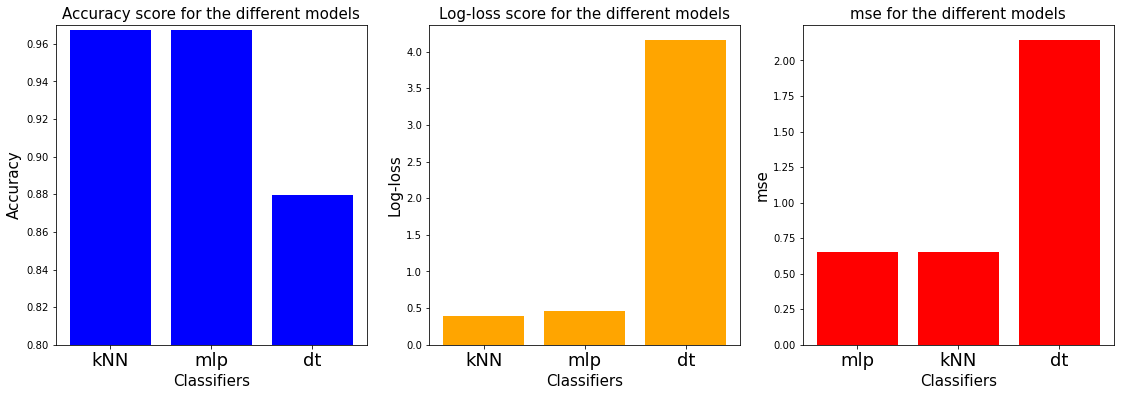

In [8]:
plt.figure(figsize = (15, 20))
plt.rc("xtick", labelsize=18)

plt.subplot(331)
plt.bar(x = accuracies_df.index.values, height = accuracies_df.iloc[:, 0], color = "blue")
plt.title("Accuracy score for the different models", fontsize=15)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0.8,0.97)

plt.subplot(332)
plt.bar(x = losses_df.index.values, height = losses_df.iloc[:, 0], color = "orange")
plt.title("Log-loss score for the different models", fontsize=15)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Log-loss', fontsize=15)

plt.subplot(333)
plt.bar(x = mse_df.index.values, height = mse_df.iloc[:, 0], color = "red")
plt.title("mse for the different models", fontsize=15)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('mse', fontsize=15)

plt.subplots_adjust(left=0.01, right=0.99)

plt.show()

## Model Evaluation

In [9]:
# Checking the generalizability based on accuracy
best_model = models[accuracies_df.index[0]]

print('Generalized accuracy:', accuracy_score(y_test, best_model.predict(X_test)))
print('Generalized Log-loss:', log_loss(y_test, best_model.predict_proba(X_test)))
print('Generalized MSE:',mean_squared_error(y_test, best_model.predict(X_test)))
print('Generalized RMSE:',np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))

Generalized accuracy: 0.9708571428571429
Generalized Log-loss: 0.3359172047093633
Generalized MSE: 0.4877142857142857
Generalized RMSE: 0.6983654385164587


### Checking for Overfitting

In [ ]:
print("Accuracy score for train dataset on our selected model:", accuracy_score(y_train, best_model.predict(X_train)))
print("Accuracy score for test dataset on our selected model:", accuracy_score(y_test, best_model.predict(X_test)))